<a href="https://colab.research.google.com/github/fathima3367/waste_classifier/blob/main/waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:

zip_path = '/content/archive (1).zip'
dataset_path = '/content/waste_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

print("Extraction done.")


Extraction done.


In [ ]:
train_dir = "/content/waste_data/wasteclassification/train"
test_dir = "/content/waste_data/wasteclassification/test"

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)


Found 666 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5962 - loss: 0.7120 - val_accuracy: 0.8438 - val_loss: 0.4105
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8952 - loss: 0.3108 - val_accuracy: 0.8438 - val_loss: 0.3679
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8753 - loss: 0.2590 - val_accuracy: 0.8750 - val_loss: 0.2387
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9229 - loss: 0.2172 - val_accuracy: 0.9375 - val_loss: 0.1782
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9565 - loss: 0.1236 - val_accuracy: 0.9375 - val_loss: 0.1721
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9454 - loss: 0.1586 - val_accuracy: 0.9375 - val_loss: 0.1471
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9831 - loss: 0.0586 - val_accuracy: 0.9375 - val_loss: 0.1115
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9815 - loss: 0.0607 - val_accuracy: 0.9375 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


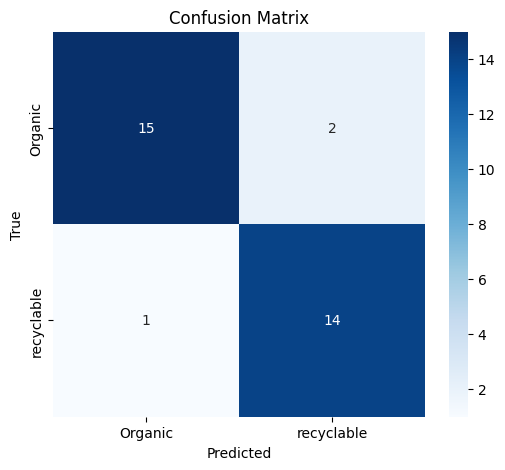

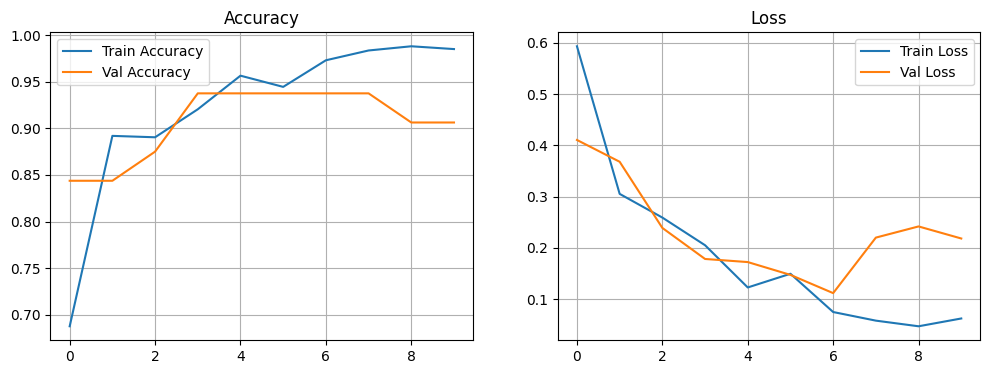

              precision    recall  f1-score   support

     Organic       0.94      0.88      0.91        17
  recyclable       0.88      0.93      0.90        15

    accuracy                           0.91        32
   macro avg       0.91      0.91      0.91        32
weighted avg       0.91      0.91      0.91        32



In [ ]:
# Predictions
Y_pred = model.predict(test_generator)
y_pred = (Y_pred > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accuracy & Loss Plots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(), plt.title('Accuracy'), plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(), plt.title('Loss'), plt.grid()
plt.show()

# Classification Report
print(classification_report(test_generator.classes, y_pred, target_names=class_names))


In [ ]:
print(test_generator.class_indices)

{'Organic': 0, 'recyclable': 1}


In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Class labels — confirm this with train_generator.class_indices
class_names = ['organic', 'recyclable']

def predict_multiple_images(model, folder_path, target_size=(150, 150), max_images=20):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))][:max_images]

    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)[0][0]
        label = class_names[0] if prediction < 0.5 else class_names[1]

        print(f"\n Image: {img_file}")
        print(f" Predicted Class: {label}")
        print(f" Confidence Score: {prediction:.4f}")
predict_multiple_images(model, "/content/waste_data/wasteclassification/test/Organic")
predict_multiple_images(model, "/content/waste_data/wasteclassification/test/recyclable")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

 Image: Dataset2_original_eggshell-jpg_23f50dad-4b44-4280-8b5c-0cf061135e1e_jpg.rf.8292a01b076f30d013c112f51decf9b1.jpg
 Predicted Class: recyclable
 Confidence Score: 0.7596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

 Image: Dataset2_original_orange-flower-jpg_12d3294d-1a8d-489d-a1d4-7ddfbeaecb27_jpg.rf.f97d6997934001489a70a1c60c969203.jpg
 Predicted Class: organic
 Confidence Score: 0.1727
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

 Image: Ly-project-dataset_original_Orange-peel-jpg_a4419f8f-f68a-4c36-a0c0-48f02cc8f65e_jpg.rf.a3ca8adccd70882e1b14608730744bf7.jpg
 Predicted Class: organic
 Confidence Score: 0.0071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

 Image: Dataset2_original_banana-peels-jpg_2b0f2b16-42e4-4e40-ac9d-f56e394e676c_jpg.rf.56934e833eff2d8e267e71d06177dc81.jpg
 Predicted Class: organic
 Confidence Score: 0.0349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

 Image: Dataset2_original_Qs86MCkIk2tKwuqhtrabApm0UAZXtYm6TR5RjOlkQk4-jpg_915da6d3-ae81-47cf

In [ ]:
model.save('/content/waste_classifier_model.h5')

In [ ]:
from google.colab import files
files.download("waste_classifier_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>